# Buypower & Mtn Partner Reconciliation

## Tasks to run

#### 1. Merge the different sp file together   ----------------------------------  2. Clean the data by deleting empty columns
#### 3. Pick the month and day into a diffferent col -----------------------  4. Remove the minus (debit)
#### 5. Analyse the sales trend ---------------------------------------------------  6. Visualise your report
#### 7. Analyse the disco with the most sales and which day?

In [1]:
## Import py libraries 

import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

### Read the list of files in the directory

In [2]:
data_files = sorted(glob('./downloads/monnify_trans/*.csv'))
data_files

['./downloads/monnify_trans\\JAN_DEC13_monnify.csv',
 './downloads/monnify_trans\\Transaction_Report_20210101-20210131.csv',
 './downloads/monnify_trans\\Transaction_Report_20210201-20210228.csv',
 './downloads/monnify_trans\\Transaction_Report_20210301-20210331.csv',
 './downloads/monnify_trans\\Transaction_Report_20210401-20210430.csv',
 './downloads/monnify_trans\\Transaction_Report_20210501-20210531.csv',
 './downloads/monnify_trans\\Transaction_Report_20210601-20210630.csv',
 './downloads/monnify_trans\\Transaction_Report_20210701-20210731.csv',
 './downloads/monnify_trans\\Transaction_Report_20210801-20210831.csv',
 './downloads/monnify_trans\\Transaction_Report_20210901-20210930.csv',
 './downloads/monnify_trans\\Transaction_Report_20211001-20211031.csv',
 './downloads/monnify_trans\\Transaction_Report_20211101-20211130.csv',
 './downloads/monnify_trans\\Transaction_Report_20211201-20211214.csv']

### Merge the files together

In [3]:
merge_data = pd.concat(pd.read_csv(df).assign(filename = df) 
                      for df in data_files)

merge_data

<ipython-input-3-94f6f88c6511>:1: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  merge_data = pd.concat(pd.read_csv(df).assign(filename = df)


ParserError: Error tokenizing data. C error: Expected 12 fields in line 2512, saw 13


### Delete the empty and unnecessary columns

In [25]:
delete_column = ['From Handler Name','Initiated By','On Behalf Of','Provider Category','Information','Note/Message','External Amount','Currency.1','External FX Rate','External Service Provider','Currency.2','Discount','Currency.3','Promotion','Currency.4','Coupon','Currency.5','Balance','Currency.6']
merge_data = merge_data.drop(columns = delete_column)

### Create new columns Month and Day

In [26]:
merge_data['Day'] = merge_data['Date'].str[8:10]
merge_data['Month'] = merge_data['Date'].str[5:7]

merge_data[['Month','Day']] = merge_data[['Month','Day']].astype('int32')

merge_data


,Id,External Transaction Id,Date,Status,Type,From,From Name,To,To Name,To Handler Name,Amount,Currency,Fee,filename,Day,Month
0,246093265,246093265,2021-07-31 23:40:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7
1,246092688,246092688,2021-07-31 23:39:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7
2,246092126,246092126,2021-07-31 23:38:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7
3,246091622,246091622,2021-07-31 23:37:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7
4,246090761,246090761,2021-07-31 23:36:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,309013279,309013279,2021-10-01 08:36:00,Successful,External payment,FRI:2348063582638/MSISDN,USMAN MUSTAPHA,FRI:58000082352@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,500.0,NGN,8.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10
1807,309008964,309008964,2021-10-01 08:30:00,Successful,External payment,FRI:2347032618376/MSISDN,ASHIRU SURAJO,FRI:0137200143345@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,450.0,NGN,7.20,./downloads/all_mtn_success\3966792_2021-10-01...,1,10
1808,308977882,308977882,2021-10-01 07:39:01,Successful,External payment,FRI:2348062212190/MSISDN,AMINU MUSTAPHA,FRI:0137200025443@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,1000.0,NGN,16.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10
1809,308951156,308951156,2021-10-01 06:11:00,Successful,External payment,FRI:2348140050513/MSISDN,Airtime Networks Teller23,FRI:30530250049@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,2000.0,NGN,32.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10


### Check for debit in the Amount column

In [27]:
merge_data['Amount'] = pd.to_numeric(merge_data['Amount'])
merge_data = merge_data.assign(Debit=lambda merge_data: merge_data['Amount'] < 1)

merge_data 

,Id,External Transaction Id,Date,Status,Type,From,From Name,To,To Name,To Handler Name,Amount,Currency,Fee,filename,Day,Month,Debit
0,246093265,246093265,2021-07-31 23:40:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
1,246092688,246092688,2021-07-31 23:39:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
2,246092126,246092126,2021-07-31 23:38:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
3,246091622,246091622,2021-07-31 23:37:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
4,246090761,246090761,2021-07-31 23:36:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,309013279,309013279,2021-10-01 08:36:00,Successful,External payment,FRI:2348063582638/MSISDN,USMAN MUSTAPHA,FRI:58000082352@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,500.0,NGN,8.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False
1807,309008964,309008964,2021-10-01 08:30:00,Successful,External payment,FRI:2347032618376/MSISDN,ASHIRU SURAJO,FRI:0137200143345@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,450.0,NGN,7.20,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False
1808,308977882,308977882,2021-10-01 07:39:01,Successful,External payment,FRI:2348062212190/MSISDN,AMINU MUSTAPHA,FRI:0137200025443@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,1000.0,NGN,16.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False
1809,308951156,308951156,2021-10-01 06:11:00,Successful,External payment,FRI:2348140050513/MSISDN,Airtime Networks Teller23,FRI:30530250049@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,2000.0,NGN,32.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False


In [34]:
merge_data.to_csv('./downloads/all_mtn_success/d1.csv', index= 'true')

### Bring out credit rows only 

In [28]:
merge_credit_data = merge_data.loc[merge_data['Debit'] == False]
merge_credit_data

,Id,External Transaction Id,Date,Status,Type,From,From Name,To,To Name,To Handler Name,Amount,Currency,Fee,filename,Day,Month,Debit
0,246093265,246093265,2021-07-31 23:40:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
1,246092688,246092688,2021-07-31 23:39:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
2,246092126,246092126,2021-07-31 23:38:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
3,246091622,246091622,2021-07-31 23:37:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
4,246090761,246090761,2021-07-31 23:36:00,Successful,External payment,FRI:2348103049429/MSISDN,Patricia Ibrahim,FRI:02146172298@startimes.sp/SP,Startimes,Startimes Cable,90.0,NGN,1.35,./downloads/all_mtn_success\3823082_2021-07-01...,31,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,309013279,309013279,2021-10-01 08:36:00,Successful,External payment,FRI:2348063582638/MSISDN,USMAN MUSTAPHA,FRI:58000082352@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,500.0,NGN,8.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False
1807,309008964,309008964,2021-10-01 08:30:00,Successful,External payment,FRI:2347032618376/MSISDN,ASHIRU SURAJO,FRI:0137200143345@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,450.0,NGN,7.20,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False
1808,308977882,308977882,2021-10-01 07:39:01,Successful,External payment,FRI:2348062212190/MSISDN,AMINU MUSTAPHA,FRI:0137200025443@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,1000.0,NGN,16.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False
1809,308951156,308951156,2021-10-01 06:11:00,Successful,External payment,FRI:2348140050513/MSISDN,Airtime Networks Teller23,FRI:30530250049@kedco.sp/SP,KEDCO - Electricity,KEDCO - Electricity,2000.0,NGN,32.00,./downloads/all_mtn_success\3966792_2021-10-01...,1,10,False


In [33]:
merge_debit_data = merge_data.loc[merge_data['Debit'] == True]
merge_debit_data

,Id,External Transaction Id,Date,Status,Type,From,From Name,To,To Name,To Handler Name,Amount,Currency,Fee,filename,Day,Month,Debit
2575,235271012,YDFS235271012,2021-07-22 15:36:45,Successful,Withdrawal,FRI:3823082/MM,Startimes Cable,FRI:0723229267@044150149/BANK,NaN,NaN,-1840000.0,NGN,NaN,./downloads/all_mtn_success\3823082_2021-07-01...,22,7,True
4351,230132366,YDFS230132366,2021-07-17 12:21:12,Successful,Withdrawal,FRI:3823082/MM,Startimes Cable,FRI:0723229267@044150149/BANK,NaN,NaN,-1320000.0,NGN,NaN,./downloads/all_mtn_success\3823082_2021-07-01...,17,7,True
5454,224762097,YDFS224762097,2021-07-12 09:25:53,Successful,Withdrawal,FRI:3823082/MM,Startimes Cable,FRI:0723229267@044150149/BANK,NaN,NaN,-1100000.0,NGN,NaN,./downloads/all_mtn_success\3823082_2021-07-01...,12,7,True
6560,217904033,YDFS217904033,2021-07-04 09:33:55,Successful,Withdrawal,FRI:3823082/MM,Startimes Cable,FRI:0723229267@044150149/BANK,NaN,NaN,-1350000.0,NGN,NaN,./downloads/all_mtn_success\3823082_2021-07-01...,4,7,True
600,274724794,YDFS274724794,2021-08-29 21:58:24,Successful,Withdrawal,FRI:3823082/MM,Startimes Cable,FRI:0723229267@044150149/BANK,NaN,NaN,-1350000.0,NGN,NaN,./downloads/all_mtn_success\3823082_2021-08-01...,29,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,282818257,YDFS282818257,2021-09-07 13:33:37,Successful,Withdrawal,FRI:3966792/MM,KEDCO - Electricity,FRI:0723229267@044150149/BANK,NaN,NaN,-645000.0,NGN,NaN,./downloads/all_mtn_success\3966792_2021-09-01...,7,9,True
1605,278217340,YDFS278217340,2021-09-02 12:50:50,Successful,Withdrawal,FRI:3966792/MM,KEDCO - Electricity,FRI:0723229267@044150149/BANK,NaN,NaN,-550000.0,NGN,NaN,./downloads/all_mtn_success\3966792_2021-09-01...,2,9,True
435,327432497,YDFS327432497,2021-10-19 09:28:44,Successful,Withdrawal,FRI:3966792/MM,KEDCO - Electricity,FRI:0723229267@044150149/BANK,NaN,NaN,-350000.0,NGN,NaN,./downloads/all_mtn_success\3966792_2021-10-01...,19,10,True
763,322398774,YDFS322398774,2021-10-14 16:39:53,Successful,Withdrawal,FRI:3966792/MM,KEDCO - Electricity,FRI:0723229267@044150149/BANK,NaN,NaN,-1150000.0,NGN,NaN,./downloads/all_mtn_success\3966792_2021-10-01...,14,10,True


In [31]:
merge_credit_data['Amount'].sum()

181175625.0

In [30]:
merge_debit_data['Amount'].sum()

-172798000.0

### Analyse the daily Amount and fee trend

In [29]:
merge_data[['Id','Debit']] = merge_data[['Id','Debit']].astype('str')
merge_data['Amount'] = pd.to_numeric(merge_data['Amount'])
merge_data['Month'] = pd.to_datetime(merge_data['Month'])
daily_vis = merge_data.groupby('Day').sum()
daily_vis

C:\Users\BUYPOWER\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-29-f3e73af48fca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['Amount'] = pd.to_numeric(merge_data['Amount'])
<ipython-input-29-f3e73af48fca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Amount,Fee
Day,,
1,1604860.0,24587.61
2,1661250.0,25257.61
3,1583905.0,24709.33
4,1608530.0,24933.36
5,1273239.0,19703.76
6,1773732.0,26921.68
7,2066235.0,33982.97
8,443888.0,6148.59
9,2920610.0,47163.48


### Visualise your report

<AxesSubplot:xlabel='Day'>

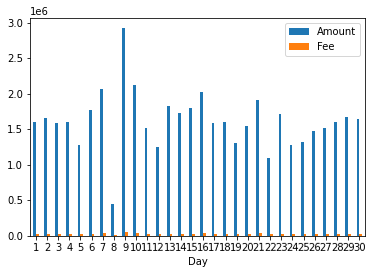

In [32]:

daily_vis.plot.bar(rot=1, fig= 9)

In [11]:
merge_data['Day'] = pd.to_datetime(merge_data['Day'])
sp_vis = merge_data.groupby('To Name').sum()
sp_vis

<ipython-input-11-bc0fc528eadf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['Day'] = pd.to_datetime(merge_data['Day'])


,Fee
To Name,
AEDC,49467.70
EEDC,231896.04
EKEDC,17047.90
IBEDC,13991.60
IKEDC,23876.60
JED,163100.64
KAEDCO,33762.00
KEDCO - Electricity,38965.96
PHEDC,58410.15


<AxesSubplot:xlabel='To Name'>

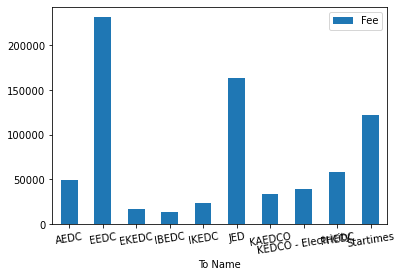

In [12]:
sp_vis.plot.bar(rot= 9)

In [198]:
test = merge_data.pivot(columns= 'To Name', values= 'Amount')
test.head(30)

To Name,AEDC,EEDC,EKEDC,IBEDC,IKEDC,JED,KAEDCO,KEDCO - Electricity,PHEDC,Startimes
0,1000.0,500.0,1000.0,2150.0,1000.0,100.0,1500.0,900.0,1000.0,2500.0
1,5000.0,500.0,1000.0,900.0,1000.0,800.0,1000.0,900.0,1000.0,1700.0
2,500.0,1000.0,5000.0,900.0,1000.0,190.0,1000.0,10000.0,2000.0,2500.0
3,500.0,900.0,1400.0,6000.0,400.0,200.0,1000.0,950.0,1000.0,2200.0
4,2000.0,500.0,5000.0,2000.0,800.0,190.0,1500.0,5000.0,1000.0,160.0
5,2000.0,500.0,1500.0,1000.0,900.0,950.0,2000.0,500.0,1500.0,900.0
6,2900.0,2000.0,2500.0,1000.0,1000.0,600.0,1000.0,500.0,1500.0,160.0
7,500.0,1500.0,2000.0,500.0,5000.0,200.0,1000.0,1000.0,500.0,2500.0
8,3000.0,2000.0,2000.0,10000.0,300.0,100.0,2000.0,5000.0,500.0,160.0
9,500.0,1400.0,1000.0,1000.0,100.0,500.0,900.0,3000.0,1000.0,1700.0


In [163]:

## days = range(12, 22)
## plt.bar(days, data_vis)
## plt.xticks(days)
## plt.show()

In [32]:
merge_data.to_csv('./downloads/partner_mtn/mtn_rep.csv', index= 'true')

In [2]:
S = 'Name'

In [6]:
S[0]+S[1:]

'Name'